In [43]:
import numpy as np
import pandas as pd

In [94]:
df = pd.read_csv("./data/train.csv")
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value
0,0,51.491,-0.172,301,6,3,10,14.5
1,1,39.386,-121.158,254,3,21,9,34.5
2,2,51.459,0.596,301,6,3,10,10.5
3,3,35.299,-120.613,145,2,14,5,15.5
4,4,29.927,120.527,221,0,14,8,54.5


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7649 non-null   int64  
 1   latitude         7636 non-null   float64
 2   longitude        7636 non-null   float64
 3   day_of_year      7649 non-null   int64  
 4   day_of_week      7649 non-null   int64  
 5   hour             7649 non-null   int64  
 6   month            7649 non-null   int64  
 7   pollution_value  7649 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 478.2 KB


In [96]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'pollution_value'],
      dtype='object')

In [97]:
df.isna().sum()

id                  0
latitude           13
longitude          13
day_of_year         0
day_of_week         0
hour                0
month               0
pollution_value     0
dtype: int64

In [48]:
df_missing = df[df.isna().any(axis=1)]
df_missing

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value
1524,1524,NaN,NaN,228,0,23,8,36.1
1810,1810,NaN,NaN,241,0,15,8,4.5
2599,2599,NaN,NaN,87,0,8,3,7.0
3183,3183,NaN,NaN,242,1,3,8,4.5
3470,3470,NaN,NaN,243,2,9,8,4.5
3657,3657,NaN,NaN,243,2,7,8,4.5
3748,3748,NaN,NaN,243,2,6,8,4.5
4105,4105,NaN,NaN,242,1,4,8,4.5
5175,5175,NaN,NaN,228,0,22,8,38.0
5888,5888,NaN,NaN,151,2,2,5,10.1


In [ ]:
# # Data Cleaning | Filling missing values
# # Fill missing latitude and longitude for index 1524 and 5175 with values from index 5756
# df.loc[1524, ['latitude', 'longitude']] = df.loc[5756, ['latitude', 'longitude']]
# df.loc[5175, ['latitude', 'longitude']] = df.loc[5756, ['latitude', 'longitude']]

# # Fill missing latitude and longitude for index 3183, 4105, 6979 and 7161 with values from index 310
# df.loc[3183, ['latitude', 'longitude']] = df.loc[310, ['latitude', 'longitude']]
# df.loc[4105, ['latitude', 'longitude']] = df.loc[310, ['latitude', 'longitude']]
# df.loc[6979, ['latitude', 'longitude']] = df.loc[310, ['latitude', 'longitude']]
# df.loc[7161, ['latitude', 'longitude']] = df.loc[310, ['latitude', 'longitude']]

# # Fill missing latitude and longitude for index 3470, 3657, and 3748 with values from index 230
# df.loc[3470, ['latitude', 'longitude']] = df.loc[230, ['latitude', 'longitude']]
# df.loc[3657, ['latitude', 'longitude']] = df.loc[230, ['latitude', 'longitude']]
# df.loc[3748, ['latitude', 'longitude']] = df.loc[230, ['latitude', 'longitude']]

# # Fill missing latitude and longitude for index 1810 with values from index 5606
# df.loc[1810, ['latitude', 'longitude']] = df.loc[5606, ['latitude', 'longitude']]

# # Fill missing latitude and longitude for index 2599 with values from index 4064
# df.loc[2599, ['latitude', 'longitude']] = df.loc[4064, ['latitude', 'longitude']]

# # Fill missing latitude and longitude for index 5888 with values from index 5863
# df.loc[5888, ['latitude', 'longitude']] = df.loc[5863, ['latitude', 'longitude']]

# # Fill missing latitude and longitude for index 6751 with values from index 4345
# df.loc[6751, ['latitude', 'longitude']] = df.loc[4345, ['latitude', 'longitude']]

In [50]:
df.isna().sum()

id                 0
latitude           0
longitude          0
day_of_year        0
day_of_week        0
hour               0
month              0
pollution_value    0
dtype: int64

In [98]:
df_clean = df.copy()

In [99]:
lat_median = df["latitude"].median()
long_median = df["longitude"].median()

df_clean["latitude"] = df["latitude"].fillna(lat_median)
df_clean["longitude"] = df["longitude"].fillna(long_median)

In [100]:
# # Removing two data points with extreme values (based on error analysis)
# df_clean = df_clean.drop([511, 1956])

# Machine Learning Modeling

In [101]:
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm
import geopandas as gpd

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import root_mean_squared_error

import shap

RANDOM_STATE = 14

In [102]:
# # Filling missing values with knnimputer
# train_1 = shuffle(df_clean_1, random_state=RANDOM_STATE)

# Feature Engineering

In [103]:
# Feature Engineering for Air Pollution Prediction (Feature Enigineering 1)

# 1. Cyclical encoding for time features
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)
df_clean['day_of_week_sin'] = np.sin(2 * np.pi * df_clean['day_of_week'] / 7)
df_clean['day_of_week_cos'] = np.cos(2 * np.pi * df_clean['day_of_week'] / 7)

# 2. Interaction features
df_clean['lat_long'] = df_clean['latitude'] * df_clean['longitude']

# 3. Distance from a reference point (e.g., city center)
# Example: Reference point (mean latitude/longitude)
ref_lat = df_clean['latitude'].mean()
ref_long = df_clean['longitude'].mean()
df_clean['dist_center'] = np.sqrt((df_clean['latitude'] - ref_lat)**2 + (df_clean['longitude'] - ref_long)**2)

# 4. Remove original cyclical columns if desired
#df_clean = df_clean.drop(['hour', 'month', 'day_of_week'], axis=1)


In [104]:
# # 1. Add squared and interaction terms
# df_clean['latitude_squared'] = df_clean['latitude'] ** 2
# df_clean['longitude_squared'] = df_clean['longitude'] ** 2
# df_clean['lat_long_interaction'] = df_clean['latitude'] * df_clean['longitude']

# # 2. Add rolling/statistical features (if you have time series data)
# # Example: rolling mean pollution value by location (requires pollution_value column)
# # df_clean['rolling_mean_pollution'] = df_clean.groupby(['latitude', 'longitude'])['pollution_value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# # 3. Add categorical bins for latitude/longitude
# df_clean['lat_bin'] = pd.cut(df_clean['latitude'], bins=5, labels=False)
# df_clean['long_bin'] = pd.cut(df_clean['longitude'], bins=5, labels=False)

In [105]:
# # Create a 'season' column as a number based on the month
# def get_season_num(month):
#     if month in [12, 1, 2]:
#         return 0  # Winter
#     elif month in [3, 4, 5]:
#         return 1  # Spring
#     elif month in [6, 7, 8]:
#         return 2  # Summer
#     else:
#         return 3  # Autumn

# df_clean['season'] = df_clean['month'].apply(get_season_num)

In [106]:
# Load world country polygons
world = gpd.read_file("./data/110m_cultural/ne_110m_admin_0_countries.shp")

# Convert your DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_clean,
    geometry=gpd.points_from_xy(df_clean.longitude, df_clean.latitude),
    crs="EPSG:4326"
)

# Spatial join: assign country to each point
gdf_with_country = gpd.sjoin(gdf, world[['geometry', 'NAME']], how='left', predicate='within')
df_clean['country'] = gdf_with_country['NAME']

In [107]:
df_clean.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value,hour_sin,hour_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos,lat_long,dist_center,country
0,0,51.491,-0.172,301,6,3,10,14.5,0.707107,0.707107,-0.866025,5.000000e-01,-0.781831,0.623490,-8.856452,37.825727,United Kingdom
1,1,39.386,-121.158,254,3,21,9,34.5,-0.707107,0.707107,-1.000000,-1.836970e-16,0.433884,-0.900969,-4771.928988,153.518152,United States of America
2,2,51.459,0.596,301,6,3,10,10.5,0.707107,0.707107,-0.866025,5.000000e-01,-0.781831,0.623490,30.669564,37.154191,United Kingdom
3,3,35.299,-120.613,145,2,14,5,15.5,-0.500000,-0.866025,0.500000,-8.660254e-01,0.974928,-0.222521,-4257.518287,152.827967,United States of America
4,4,29.927,120.527,221,0,14,8,54.5,-0.500000,-0.866025,-0.866025,-5.000000e-01,0.000000,1.000000,3607.011529,88.371864,China


In [108]:
df_clean['country'] = df_clean['country'].fillna('Unknown')

In [109]:
# df_clean.to_csv('df_clean.csv', index=False)

In [110]:
train = shuffle(df_clean, random_state=RANDOM_STATE)

In [111]:
# train.columns

In [112]:
X = train.drop(columns=["id", "pollution_value"], axis=1)
y = train["pollution_value"]
X.shape, y.shape

((7649, 15), (7649,))

"month_cos", "day_of_week_cos", 
                        "hour_cos", "hour_sin", "hour", 
                        "day_of_week", "day_of_week_sin", 
                        "month", "month_sin"

In [113]:
X.columns

Index(['latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour', 'month',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_of_week_sin',
       'day_of_week_cos', 'lat_long', 'dist_center', 'country'],
      dtype='object')

In [114]:
# imputer = KNNImputer(n_neighbors=5)
# imputer.fit(X)
# X_imputed = imputer.transform(X)

# # Convert back to a DataFrame to see the result
# X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

In [115]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=RANDOM_STATE)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape  

((6119, 15), (1530, 15), (6119,), (1530,))

In [116]:
cols = [col for col in X.columns if col != 'country']

In [117]:
preprocessor = ColumnTransformer([
    # ("poly", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False), cols),
    ("scaler", RobustScaler(), cols),
    ('encoder', OneHotEncoder(handle_unknown='ignore'), ["country"])
])

In [118]:
xgb = XGBRegressor()
rf = RandomForestRegressor(random_state=RANDOM_STATE)
dtree = DecisionTreeRegressor(random_state=RANDOM_STATE)
lr = LinearRegression()
ridge = Ridge(random_state=RANDOM_STATE)
lasso = Lasso(random_state=RANDOM_STATE)
gb = GradientBoostingRegressor(random_state=RANDOM_STATE)

In [153]:
# data_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', xgb)
# ])

# data_pipeline.fit(X_train, y_train)
# y_pred = data_pipeline.predict(X_valid)

# score = root_mean_squared_error(y_valid, y_pred)
# print(f"Root Mean Squared Error: {score}")

# custom_score = np.exp(-score / 100)
# print(f"Scaled RMSE (exp(-RMSE/100)): {custom_score}")

In [ ]:
# # Models Benchmarking
# models = [lr, ridge, lasso, dtree, gb, xgb, rf]
# model_name = []
# score = []
# train_score = []
# std = []

# for model in models:
#     cv = KFold(n_splits=5)
#     model_pipeline = Pipeline([
#         ("preprocessor", preprocessor),
#         ("model", model)
#     ])

#     model_cv = cross_val_score(model_pipeline, 
#                              X_train, 
#                              y_train, 
#                              cv=cv, 
#                              scoring="neg_root_mean_squared_error")
    
#     print(model_cv, model)

#     # Model Evaluation
#     score.append(model_cv)
#     train_score.append(model_cv.mean())
#     std.append(model_cv.std())
#     model_name.append(model.__class__.__name__)

#     # Storing results
#     benchmark_df = pd.DataFrame({
#         "model":model_name,
#         "rmse_score":train_score,
#         "std":std}).sort_values(by="rmse_score", ascending=True)
    
# benchmark_df

[-52.03673822 -28.23933019 -34.91831664 -44.44075078 -56.55338008] LinearRegression()
[-52.03669825 -28.23898953 -34.91809597 -44.43795829 -56.55329074] Ridge(random_state=14)
[-52.18471262 -28.3364452  -34.84815888 -44.42252998 -56.62779929] Lasso(random_state=14)
[-55.80781432 -29.94361117 -65.4165764  -44.48317779 -53.61094198] DecisionTreeRegressor(random_state=14)
[-48.10546529 -21.36891875 -28.82806657 -37.26794075 -54.82470707] GradientBoostingRegressor(random_state=14)
[-54.9681598  -23.94917442 -30.10623836 -41.35441651 -51.41322401] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None

,model,rmse_score,std
3,DecisionTreeRegressor,-49.852424,11.975188
2,Lasso,-43.283929,10.518258
0,LinearRegression,-43.237703,10.491339
1,Ridge,-43.237007,10.491378
5,XGBRegressor,-40.358243,11.924896
4,GradientBoostingRegressor,-38.079020,12.218127
6,RandomForestRegressor,-38.040924,11.412729


In [119]:
data_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", gb)
])


data_pipeline.fit(X_train, y_train)
y_pred = data_pipeline.predict(X_valid)

score = root_mean_squared_error(y_valid, y_pred)
print(f"Root Mean Squared Error: {score}")

custom_score = np.exp(-score / 100)
print(f"Scaled RMSE (exp(-RMSE/100)): {custom_score}")

Root Mean Squared Error: 46.16273781188174
Scaled RMSE (exp(-RMSE/100)): 0.6302571437952185


best score so far 0.630630856421471

In [90]:
param_dist = {
    "model__n_estimators": Integer(100, 1000),
    "model__max_depth": Integer(3, 15),
    "model__learning_rate": Real(0.01, 0.3, prior='log-uniform'),
    "model__subsample": Real(0.5, 1.0, prior='uniform'),
    "model__min_samples_split": Integer(2, 20),
    "model__min_samples_leaf": Integer(1, 20),
    "model__max_features": Real(0.5, 1.0, prior='uniform'),
    "model__loss": Categorical(['squared_error', 'absolute_error', 'huber', 'quantile'])
}

In [91]:
data_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gb)
])

fold = KFold(n_splits=5)
bayes_search = BayesSearchCV(
    data_pipeline,
    param_dist,
    n_iter=50,
    cv=fold,
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE,
    error_score="raise",
)

bayes_search.fit(X_train, y_train)

print("Best parameters found: ", bayes_search.best_params_)
print("Best CV score (negative RMSE): ", bayes_search.best_score_)
print(f"Best CV RMSE: {-bayes_search.best_score_:.4f}")

best_model = bayes_search.best_estimator_
predictions = best_model.predict(X_valid)

score = root_mean_squared_error(y_valid, predictions)
print(f"Root Mean Squared Error: {score}")

custom_score = np.exp(-score / 100)
print(f"Scaled RMSE (exp(-RMSE/100)): {custom_score}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

best score with hyperparameter tuning 0.6359551921230686, but lower in unseen than the base

# Neural Network

In [46]:
# Neural Network model for regression using TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [63]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [70]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate on validation set
val_loss, val_rmse = model.evaluate(X_valid_scaled, y_valid)
print(f"Validation RMSE: {val_rmse:.4f}")

# Custom RMSE score
custom_score = np.exp(-val_rmse / 100)
print(f"Scaled RMSE (exp(-RMSE/100)): {custom_score}")

Epoch 1/100


c:\Users\gembo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2045.3894 - root_mean_squared_error: 45.0920 - val_loss: 2259.8411 - val_root_mean_squared_error: 47.5378
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1969.2437 - root_mean_squared_error: 43.8885 - val_loss: 2210.1931 - val_root_mean_squared_error: 47.0127
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 986.6253 - root_mean_squared_error: 30.0710 - val_loss: 2232.0261 - val_root_mean_squared_error: 47.2443
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1491.6202 - root_mean_squared_error: 37.8800 - val_loss: 2184.0686 - val_root_mean_squared_error: 46.7340
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1142.6227 - root_mean_squared_error: 33.3927 - val_loss: 2205.4590 - val_root_mean_squared_error: 46.9623
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1236.3057 - root_mean_squared_error: 34.9873 - val_loss: 2204.3970 - val_root_mean_squared_error: 46.9510
Epoch 7/100

# Model Analysis

In [23]:
final_model = data_pipeline

# Getting feature names
features = list(preprocessor.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append("_".join(feature.split("_")[2:]))

# assign feature importance
imp = final_model.named_steps['model'].feature_importances_

# to dataframe
feature_imp = pd.DataFrame({
    "Importance":imp,
    "Feature":list_features
}).sort_values(by="Importance", ascending=False)
feature_imp

,Importance,Feature
13,0.315047,dist_center
12,0.188537,lat_long
1,0.173072,longitude
0,0.128526,latitude
2,0.086704,day_of_year
9,0.022555,month_cos
11,0.021317,day_of_week_cos
7,0.020603,hour_cos
6,0.016816,hour_sin
4,0.016120,hour


In [101]:
test_transformed = pd.DataFrame(
    final_model[0].transform(X_valid)
    , columns = list_features)
test_transformed.head()

,latitude,longitude,day_of_year,hour_sin,hour_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos,lat_long,dist_center
0,0.820066,-1.012081,-0.603448,0.241181,0.868348,0.732051,-0.422650,1.246980,-0.692021,-1.016609,1.423299
1,1.010033,-0.983060,1.172414,-1.224745,0.482362,0.366025,1.732051,0.000000,0.307979,-1.017707,1.304762
2,1.064594,-0.383123,1.034483,-0.517638,-0.296177,0.366025,1.732051,-0.554958,-1.246980,-0.190950,-1.184730
3,0.440216,-0.255544,-0.603448,0.448288,0.767327,0.732051,-0.422650,1.246980,-0.692021,-0.042099,-1.710898
4,-5.042454,-0.683015,0.474138,0.241181,-0.232673,-0.267949,1.154701,1.246980,-0.692021,0.011565,0.365622


PermutationExplainer explainer: 1531it [02:01, 11.95it/s]                          


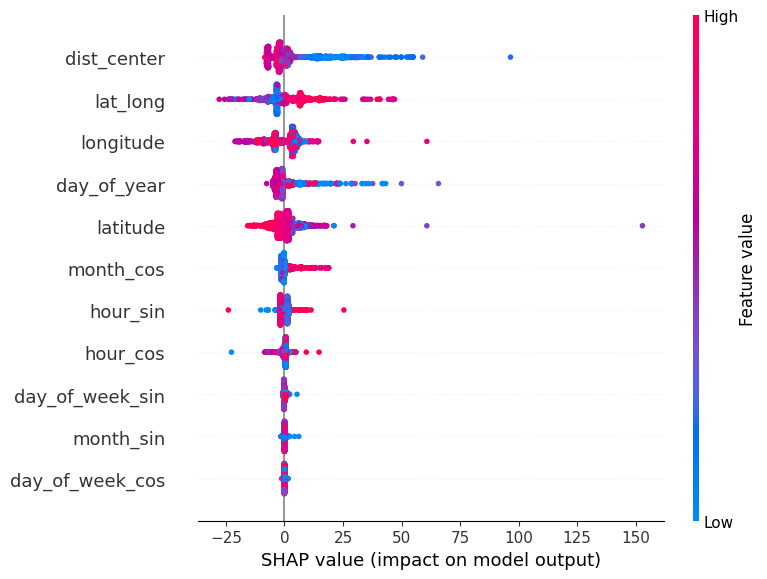

In [102]:
# Explainable AI Global

# explainer
explainer = shap.Explainer(
    final_model[-1].predict,
    final_model[0].transform(X_valid)
)

shap_values = explainer(test_transformed)
shap.summary_plot(shap_values, test_transformed)

# Error Analysis

In [70]:
model_tocheck = data_pipeline # put model to check the miss predictions
y_pred = model_tocheck.predict(X_valid)
errors = y_valid - y_pred

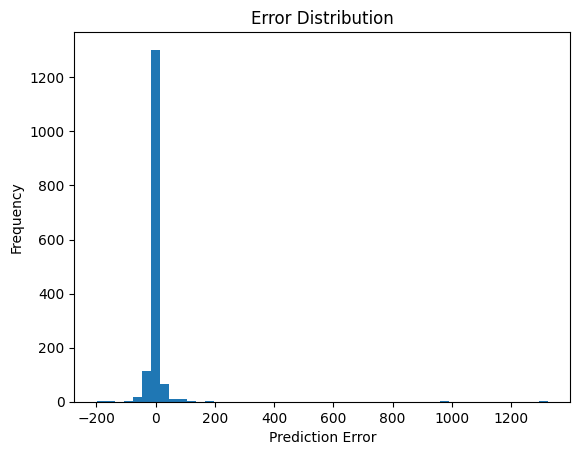

,latitude,longitude,day_of_year,hour_sin,hour_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos,lat_long,dist_center,error
6874,-25.246,-57.647,276,0.500000,-0.866025,-8.660254e-01,0.500000,0.974928,-0.222521,1455.356162,106.453972,90.838893
3603,16.502,80.607,325,0.258819,-0.965926,-5.000000e-01,0.866025,-0.433884,-0.900969,1330.176714,50.814966,-64.289052
6133,53.693,19.934,5,0.258819,-0.965926,5.000000e-01,0.866025,0.433884,-0.900969,1070.316262,25.008227,-67.264120
3776,53.400,18.488,366,-0.965926,0.258819,-2.449294e-16,1.000000,0.433884,-0.900969,987.259200,25.499332,58.834755
888,13.169,80.222,289,-0.965926,0.258819,-8.660254e-01,0.500000,-0.781831,0.623490,1056.443518,51.562387,-193.869770
...,...,...,...,...,...,...,...,...,...,...,...,...
7226,21.061,105.824,314,-0.965926,0.258819,-5.000000e-01,0.866025,0.974928,-0.222521,2228.759264,74.438512,-52.855195
7624,36.821,117.860,221,-0.500000,-0.866025,-8.660254e-01,-0.500000,0.000000,1.000000,4339.723060,85.825109,33.420793
5156,-25.587,27.098,94,-0.707107,-0.707107,8.660254e-01,-0.500000,0.781831,0.623490,-693.356526,57.697463,-23.859477
279,36.582,117.102,221,-0.500000,-0.866025,-8.660254e-01,-0.500000,0.000000,1.000000,4283.825364,85.054845,25.571587


In [103]:
# Visualize errors
import matplotlib.pyplot as plt
plt.hist(errors, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

# Analyze errors by feature
error_df = X_valid.copy()
error_df['error'] = errors

# # Example: Check error by hour
# error_by_hour = error_df.groupby('hour')['error'].mean()
# print(error_by_hour)

# Identify high-error cases
high_error_cases = error_df[np.abs(error_df['error']) > np.percentile(np.abs(error_df['error']), 90)]
high_error_cases

In [ ]:
# Analyze errors and compare with actual target for high lat_long values

# Find the 90th percentile value for lat_long
lat_long_90 = np.percentile(df_clean['lat_long'], 90)

# Filter validation data with lat_long above the 90th percentile
high_lat_long_valid = X_valid.copy()
high_lat_long_valid['error'] = errors
high_lat_long_valid['actual'] = y_valid
high_lat_long_valid['predicted'] = y_pred

high_lat_long_valid = high_lat_long_valid[high_lat_long_valid['lat_long'] > lat_long_90]

print(f"Number of validation points with lat_long above 90th percentile: {high_lat_long_valid.shape[0]}")
print(high_lat_long_valid[['lat_long', 'actual', 'predicted', 'error']].sort_values(by='error', ascending=False).head(10))

Number of validation points with lat_long above 90th percentile: 732
         lat_long     actual   predicted       error
5771  2221.394727  15.400000  188.608265 -175.374292
1863  2172.284634  20.700000  171.058542 -153.472402
3077  1447.469220   6.696193   67.877146  -77.593362
6052  2291.216829  72.500000  137.453436  -64.235643
2190  2139.179378  71.300000  122.953281  -55.847213
7226  2228.759264  16.400000   75.684246  -52.855195
7     3140.925876  16.500000   64.003793  -52.797402
1258  1368.088715  21.000000   65.630522  -52.536029
5905  2209.961864  48.200000   92.766534  -49.891960
598   2195.288220  96.500000  147.765058  -48.860952


In [87]:
# Find the 90th percentile value for dist_center
dist_center_90 = np.percentile(df_clean['dist_center'], 90)

# Filter data with dist_center above the 90th percentile
high_dist_center_df = df_clean[df_clean['dist_center'] > dist_center_90]

print(f"Number of data points with dist_center above 90th percentile: {high_dist_center_df.shape[0]}")
high_dist_center_df.head()

Number of data points with dist_center above 90th percentile: 765


,id,latitude,longitude,day_of_year,pollution_value,hour_sin,hour_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos,lat_long,dist_center
1,1,39.386,-121.158,254,34.5,-0.707107,0.707107,-1.0,-1.836970e-16,0.433884,-0.900969,-4771.928988,153.518152
3,3,35.299,-120.613,145,15.5,-0.500000,-0.866025,0.5,-8.660254e-01,0.974928,-0.222521,-4257.518287,152.827967
17,17,47.482,-120.518,151,6.3,0.500000,0.866025,0.5,-8.660254e-01,0.974928,-0.222521,-5722.435676,153.489221
62,62,37.609,-118.991,150,9.5,-0.258819,0.965926,0.5,-8.660254e-01,0.781831,0.623490,-4475.132519,151.276138
63,63,46.596,-120.490,151,4.5,0.500000,0.866025,0.5,-8.660254e-01,0.974928,-0.222521,-5614.352040,153.373859


In [95]:
# Calculate correlation of all columns with error

error_df = X_valid.copy()
error_df['error'] = errors

# If you want to include the actual target value:
error_df['actual'] = y_valid

# Compute correlation of each column with error
correlations = error_df.corr(numeric_only=True)['error'].sort_values(ascending=False)

print("Correlation of features with error:")
print(correlations)

Correlation of features with error:
error              1.000000
actual             0.887962
dist_center        0.053619
month_cos          0.050200
hour_cos           0.044639
day_of_year        0.017264
month_sin          0.014617
hour_sin           0.008407
latitude           0.000662
lat_long          -0.010771
day_of_week_cos   -0.012056
longitude         -0.039890
day_of_week_sin   -0.044880
Name: error, dtype: float64


# Predict on Test

In [82]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month
0,0,-42.343,147.372,31,4,15,1
1,1,37.053,127.406,28,1,12,1
2,2,49.105,-123.189,14,1,2,1
3,3,42.014,12.774,10,4,3,1
4,4,47.778,13.002,31,4,11,1


In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2739 non-null   int64  
 1   latitude     2739 non-null   float64
 2   longitude    2739 non-null   float64
 3   day_of_year  2739 non-null   int64  
 4   day_of_week  2739 non-null   int64  
 5   hour         2739 non-null   int64  
 6   month        2739 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 149.9 KB


In [84]:
# Feature Engineering for df_test (same as train)

# Cyclical encoding for time features
df_test['hour_sin'] = np.sin(2 * np.pi * df_test['hour'] / 24)
df_test['hour_cos'] = np.cos(2 * np.pi * df_test['hour'] / 24)
df_test['month_sin'] = np.sin(2 * np.pi * df_test['month'] / 12)
df_test['month_cos'] = np.cos(2 * np.pi * df_test['month'] / 12)
df_test['day_of_week_sin'] = np.sin(2 * np.pi * df_test['day_of_week'] / 7)
df_test['day_of_week_cos'] = np.cos(2 * np.pi * df_test['day_of_week'] / 7)

# Interaction features
df_test['lat_long'] = df_test['latitude'] * df_test['longitude']

# Distance from reference point (mean latitude/longitude from train)
df_test['dist_center'] = np.sqrt((df_test['latitude'] - ref_lat)**2 + (df_test['longitude'] - ref_long)**2)

In [85]:
df_test['country'] = gdf_with_country['NAME']

In [86]:
# # 1. Add squared and interaction terms
# df_test['latitude_squared'] = df_test['latitude'] ** 2
# df_test['longitude_squared'] = df_test['longitude'] ** 2
# df_test['lat_long_interaction'] = df_test['latitude'] * df_test['longitude']

# # 2. Add rolling/statistical features (if you have time series data)
# # Example: rolling mean pollution value by location (requires pollution_value column)
# # df_test['rolling_mean_pollution'] = df_test.groupby(['latitude', 'longitude'])['pollution_value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# # 3. Add categorical bins for latitude/longitude
# df_test['lat_bin'] = pd.cut(df_test['latitude'], bins=5, labels=False)
# df_test['long_bin'] = pd.cut(df_test['longitude'], bins=5, labels=False)

In [87]:
# df_test['season'] = df_test['month'].apply(get_season_num)

In [120]:
X_test = df_test.drop(columns=["id"], axis=1)
model_2 = data_pipeline # Replace with your trained model

test_pred = model_2.predict(X_test)

output_result = pd.DataFrame({
    "ID":df_test["id"],
    "Target":test_pred
})
output_result.head()

,ID,Target
0,0,28.684676
1,1,32.494906
2,2,12.678736
3,3,34.707045
4,4,20.740303


"month_cos", "day_of_week_cos", 
                        "hour_cos", "hour_sin", "hour", 
                        "day_of_week", "day_of_week_sin", 
                        "month", "month_sin"

In [121]:
output_result.to_csv('./data/output_resul_14.csv', index=False)